<a href="https://colab.research.google.com/github/gowtham126bmw/DS-predicting-air-quality-level-using-advanced-machine-learning-algorithm-for-environmental-insights/blob/main/Air_Quality_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
ziya07_air_quality_dataset_path = kagglehub.dataset_download('ziya07/air-quality-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/air-quality-dataset/air_quality_dataset.csv
/kaggle/input/air-quality-dataset/.nfs000000001b4acd0e000000b6
/kaggle/input/air-quality-dataset/air_quality_with_target.csv


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Reading the data set

In [ ]:
df_target = pd.read_csv(r"/kaggle/input/air-quality-dataset/air_quality_with_target.csv")
df_target

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Target
0,01-03-2004,00:00:00,-200.0,1475,120,32.8,1065,-200,502,60,1339,1270,19.9,46.4,1.3970,High
1,01-03-2004,01:00:00,-200.0,968,-200,13.0,1194,100,635,60,1187,1442,17.6,18.3,1.4657,Moderate
2,01-03-2004,02:00:00,-200.0,1097,120,9.2,1159,100,809,-200,1334,1388,10.9,59.2,0.9877,Low
3,01-03-2004,03:00:00,0.5,1032,-200,18.4,978,150,948,60,1056,789,3.8,56.2,0.8256,Low
4,01-03-2004,04:00:00,0.5,1070,120,11.1,776,-200,731,60,1300,981,15.5,20.9,1.1638,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11-04-2004,11:00:00,0.5,1269,120,14.1,851,100,842,-200,1630,1305,5.9,19.2,0.3457,High
996,11-04-2004,12:00:00,-200.0,876,150,16.3,940,150,919,100,1275,1280,15.5,26.2,0.6954,High
997,11-04-2004,13:00:00,1.0,1320,120,6.3,652,150,983,100,1019,764,2.9,58.3,1.2069,Low
998,11-04-2004,14:00:00,1.0,823,150,17.0,729,100,687,60,875,892,9.0,70.5,0.7425,High


In [ ]:
df = pd.read_csv(r"/kaggle/input/air-quality-dataset/air_quality_dataset.csv")
df

,PM2.5,PM10,NOx,NO2,SO2,VOCs,CO,CO2,CH4,Temperature,Humidity,Wind_Direction,Location_Type,Source_Label
0,39.967142,57.926035,116.192213,55.230299,4.531693,75.317261,2.789606,427.674347,1.706105,31.085120,45.454749,276,Urban,Vehicular
1,101.935672,150.774299,76.826826,79.051618,18.744780,145.083987,1.966569,529.739619,2.492663,33.711103,60.798212,134,Industrial,Industrial
2,70.996192,138.948796,158.731020,60.466604,14.892239,145.147338,2.626446,499.889443,2.431165,33.778698,54.875669,1,Industrial,Industrial
3,28.464728,63.643900,25.385343,15.333286,7.647429,130.022319,1.779360,388.283712,1.818563,31.565877,67.113319,251,Rural,Biomass Burning
4,78.265276,113.977926,105.644340,59.202337,17.696806,181.713667,3.240533,464.739197,2.597225,32.229835,37.236519,326,Industrial,Industrial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,51.380025,57.573550,31.124630,19.276010,11.167098,104.071502,1.844483,397.418878,1.923525,34.323410,67.148831,289,Rural,Biomass Burning
496,46.816837,75.372133,22.174014,18.535162,12.169426,74.802208,1.364096,392.316075,2.157281,26.321361,65.549718,270,Rural,Biomass Burning
497,33.909351,88.097250,27.630317,15.653370,7.997326,128.105470,2.319453,378.653347,1.809489,28.964494,72.687008,185,Rural,Biomass Burning
498,43.721651,40.847991,27.253977,19.365916,7.218154,106.053329,1.599748,389.878566,1.858964,29.976442,65.043244,272,Rural,Biomass Burning


# Info of the data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PM2.5           500 non-null    float64
 1   PM10            500 non-null    float64
 2   NOx             500 non-null    float64
 3   NO2             500 non-null    float64
 4   SO2             500 non-null    float64
 5   VOCs            500 non-null    float64
 6   CO              500 non-null    float64
 7   CO2             500 non-null    float64
 8   CH4             500 non-null    float64
 9   Temperature     500 non-null    float64
 10  Humidity        500 non-null    float64
 11  Wind_Direction  500 non-null    int64  
 12  Location_Type   500 non-null    object 
 13  Source_Label    500 non-null    object 
dtypes: float64(11), int64(1), object(2)
memory usage: 54.8+ KB


# Cheacking Null value

In [ ]:
df.isnull().sum()

,0
PM2.5,0
PM10,0
NOx,0
NO2,0
SO2,0
VOCs,0
CO,0
CO2,0
CH4,0
Temperature,0


# Cheacking Duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

# Overview in numerical column

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,500.0,54.671620,22.799473,10.757597,36.372940,48.038599,73.820566,127.616632
PM10,500.0,84.703251,30.567912,12.932337,61.118607,78.135558,110.270086,171.594187
NOx,500.0,91.814080,54.808414,-0.076323,35.457263,95.452284,134.709240,225.886935
NO2,500.0,42.410820,26.343669,-1.942140,17.448632,39.211583,63.817763,115.916428
SO2,500.0,11.504816,7.306978,-1.095555,5.976492,8.681222,17.116673,31.941860
VOCs,500.0,112.193098,39.471686,27.555617,81.516729,104.819124,140.588100,231.926017
CO,500.0,2.177705,0.824762,0.366992,1.536915,2.045519,2.726020,4.798935
CO2,500.0,439.288087,51.220578,366.063158,397.399610,420.934319,490.968315,558.924257
CH4,500.0,2.130439,0.391396,1.388407,1.837395,2.066709,2.386267,3.352266
Temperature,500.0,30.448413,2.957290,19.581349,28.481974,30.432756,32.614954,39.778713


# Data Visualization

In [ ]:
df.columns

Index(['PM2.5', 'PM10', 'NOx', 'NO2', 'SO2', 'VOCs', 'CO', 'CO2', 'CH4',
       'Temperature', 'Humidity', 'Wind_Direction', 'Location_Type',
       'Source_Label'],
      dtype='object')

In [ ]:
df.select_dtypes('object').columns

Index(['Location_Type', 'Source_Label'], dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

- Location_Type

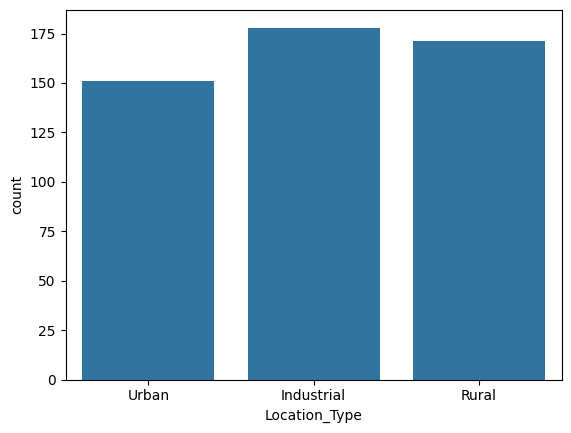

In [ ]:
sns.countplot(df,x='Location_Type')
plt.show()

- Source_Label

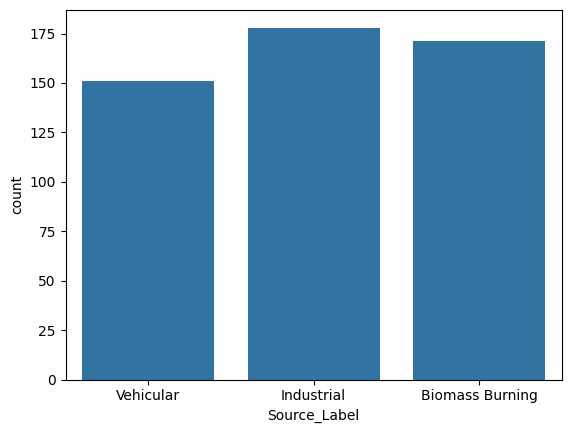

In [ ]:
sns.countplot(df,x= 'Source_Label')
plt.show()

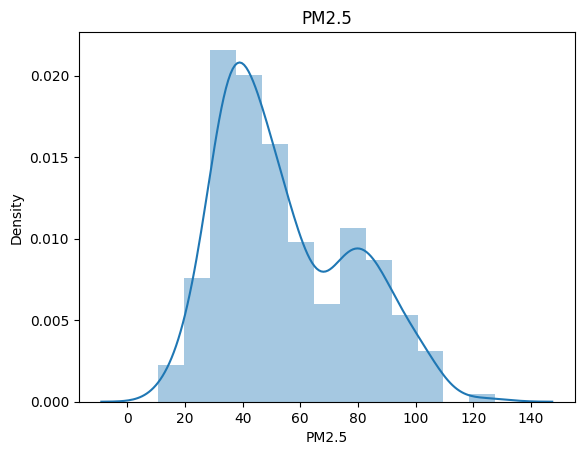

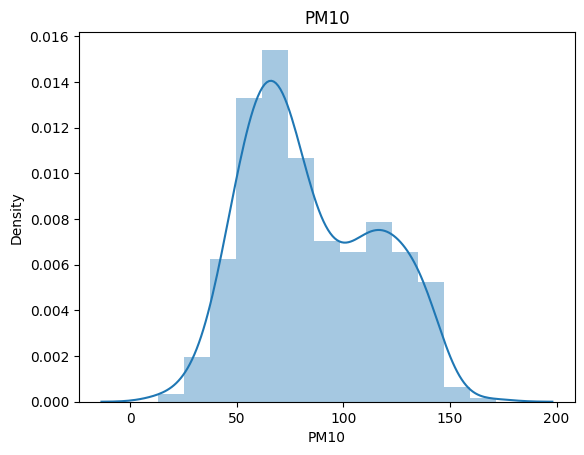

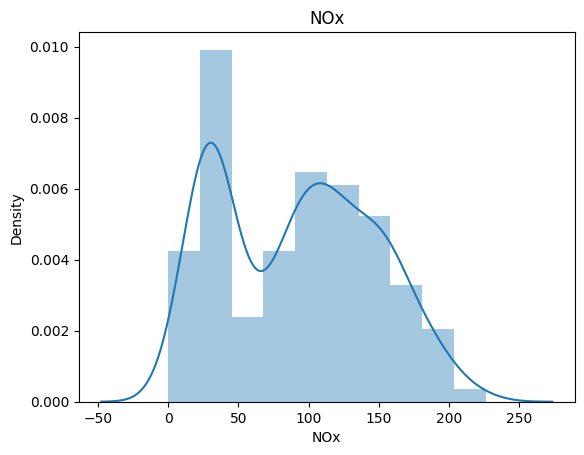

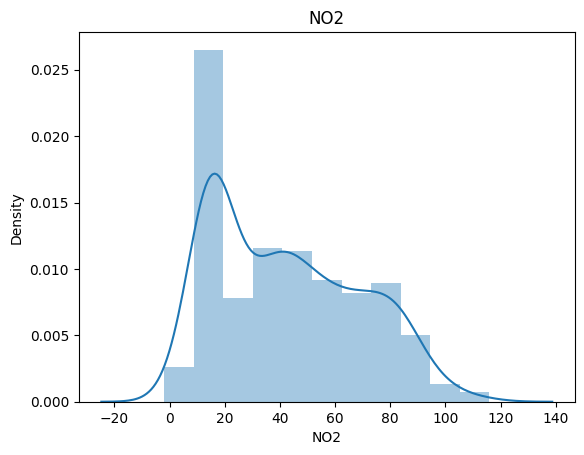

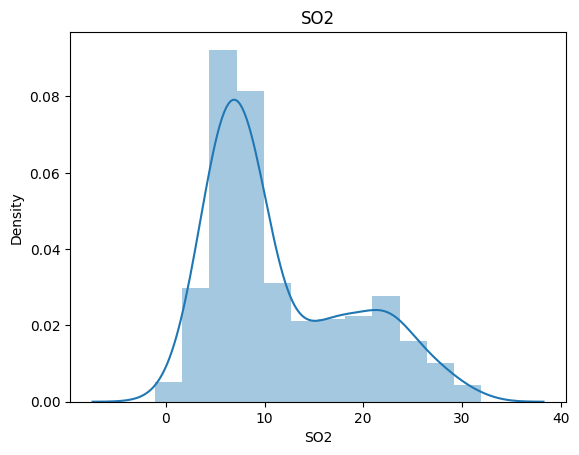

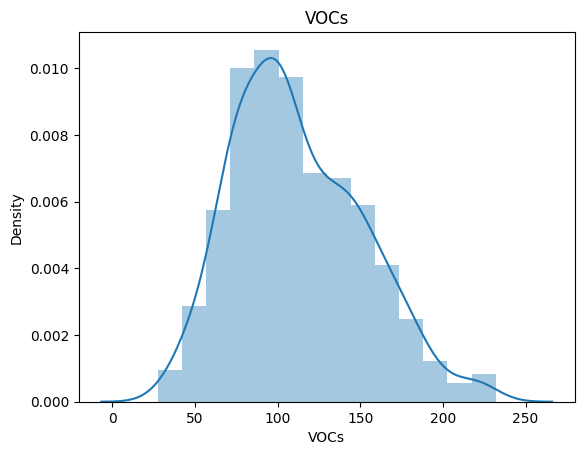

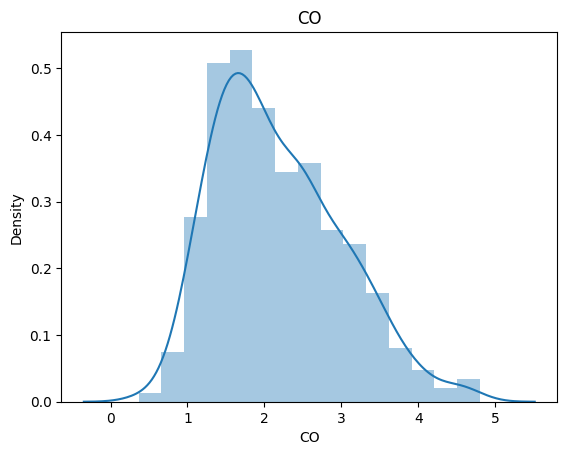

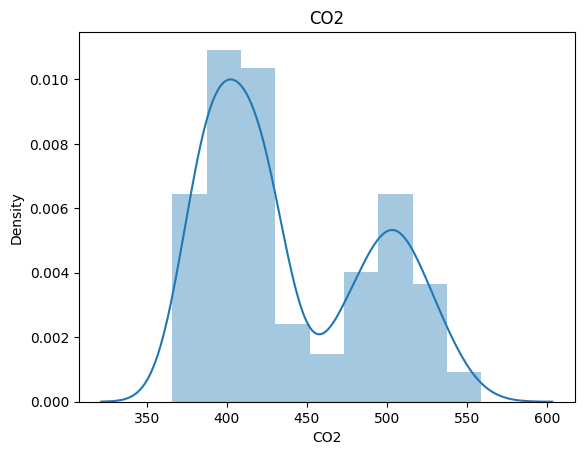

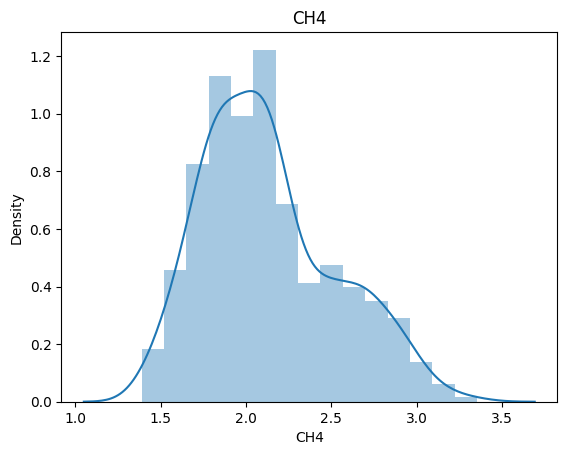

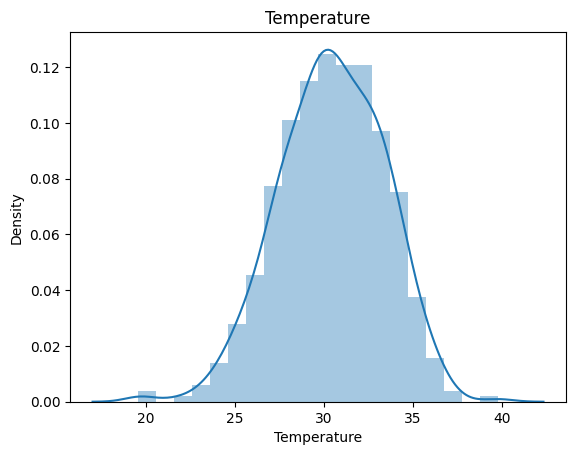

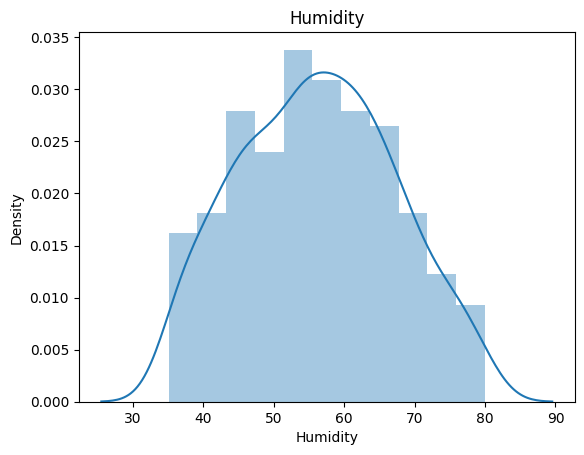

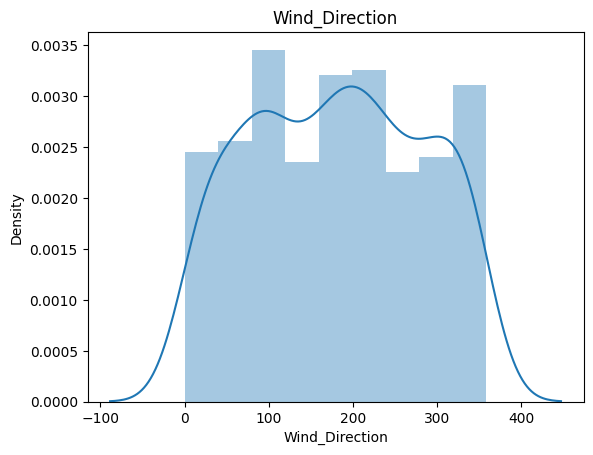

In [ ]:
for i in df.select_dtypes(['float64','int64']).columns:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

- Box Plot

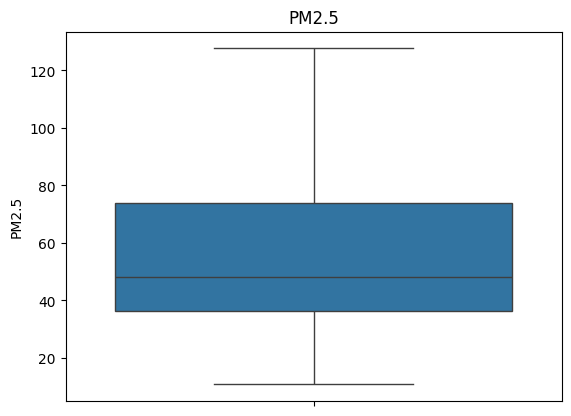

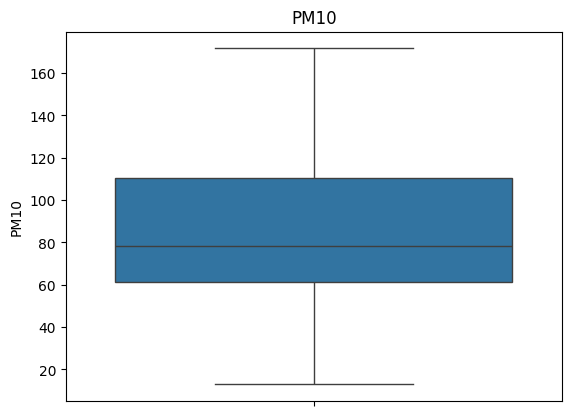

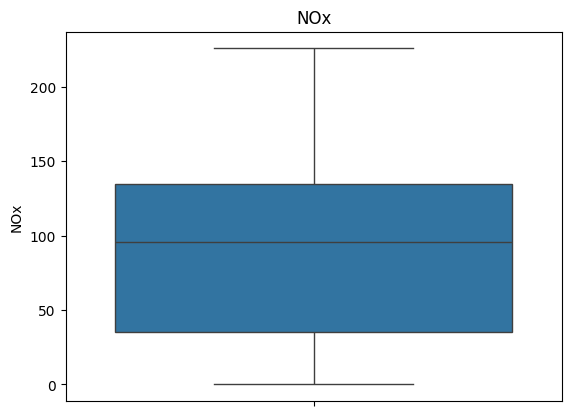

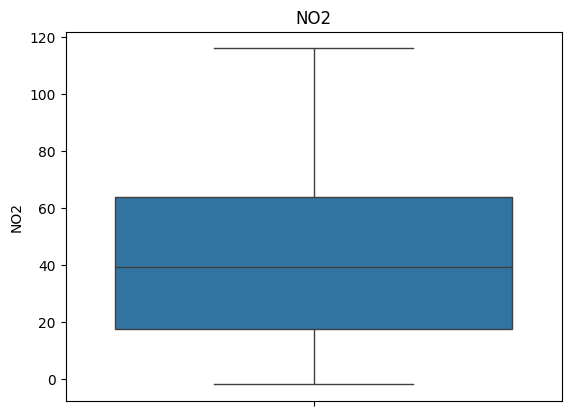

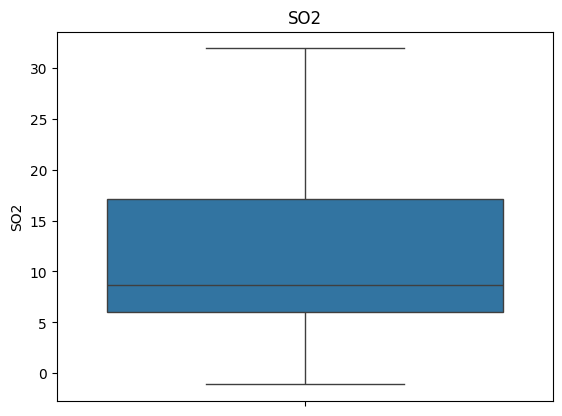

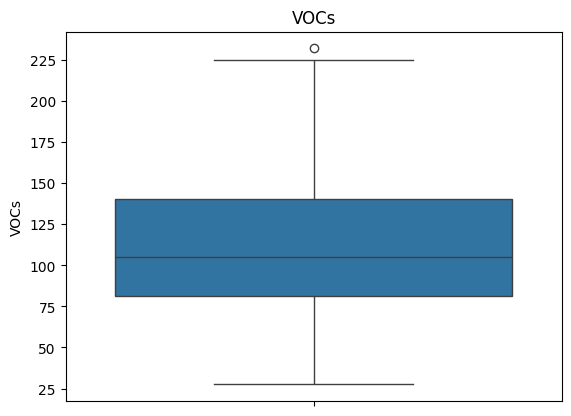

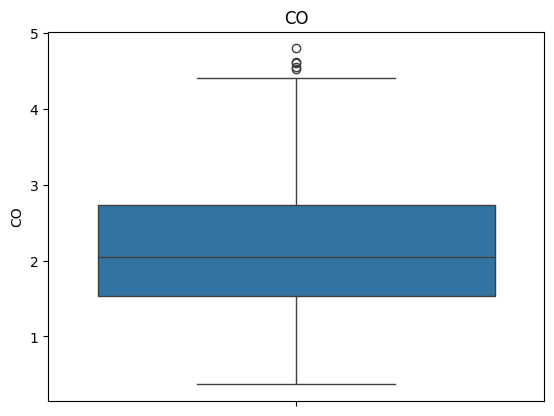

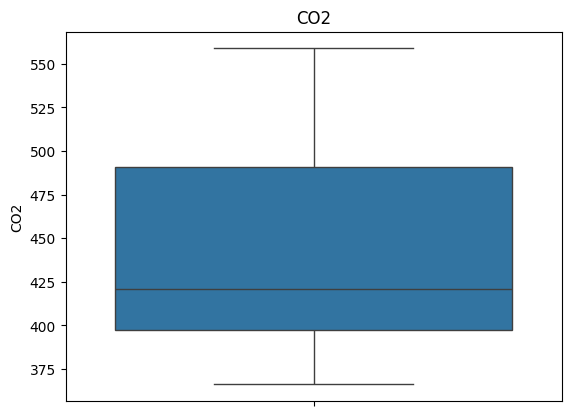

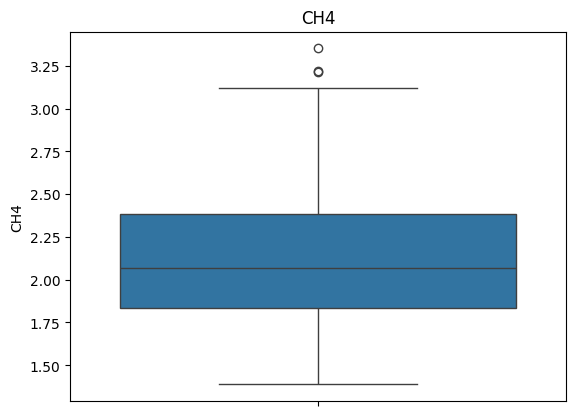

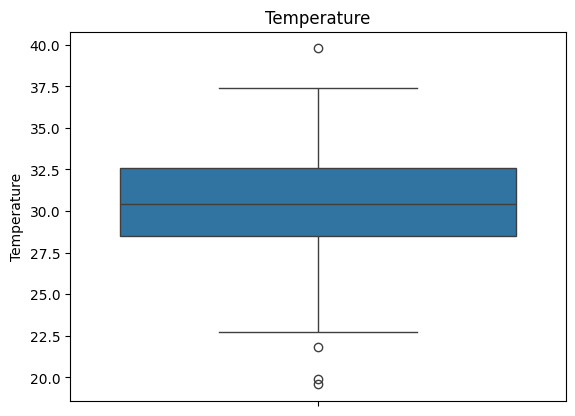

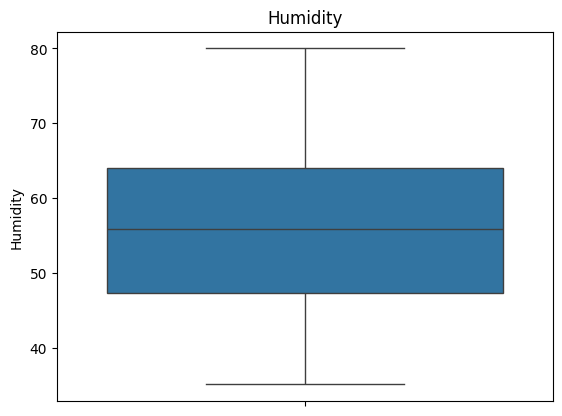

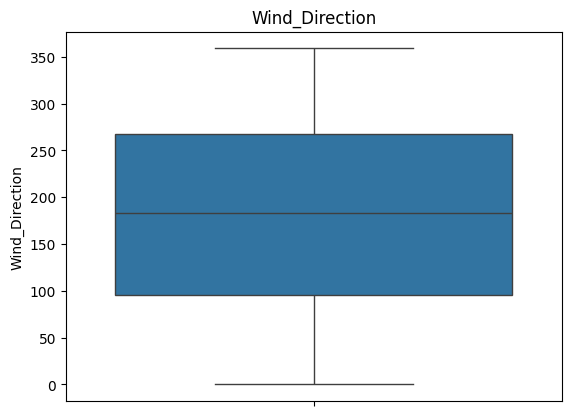

In [ ]:
for i in df.select_dtypes(['float64','int64']).columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [ ]:
df['CO'].max()

4.798934924832734

In [ ]:
df['CO2'].max()

558.9242565332645

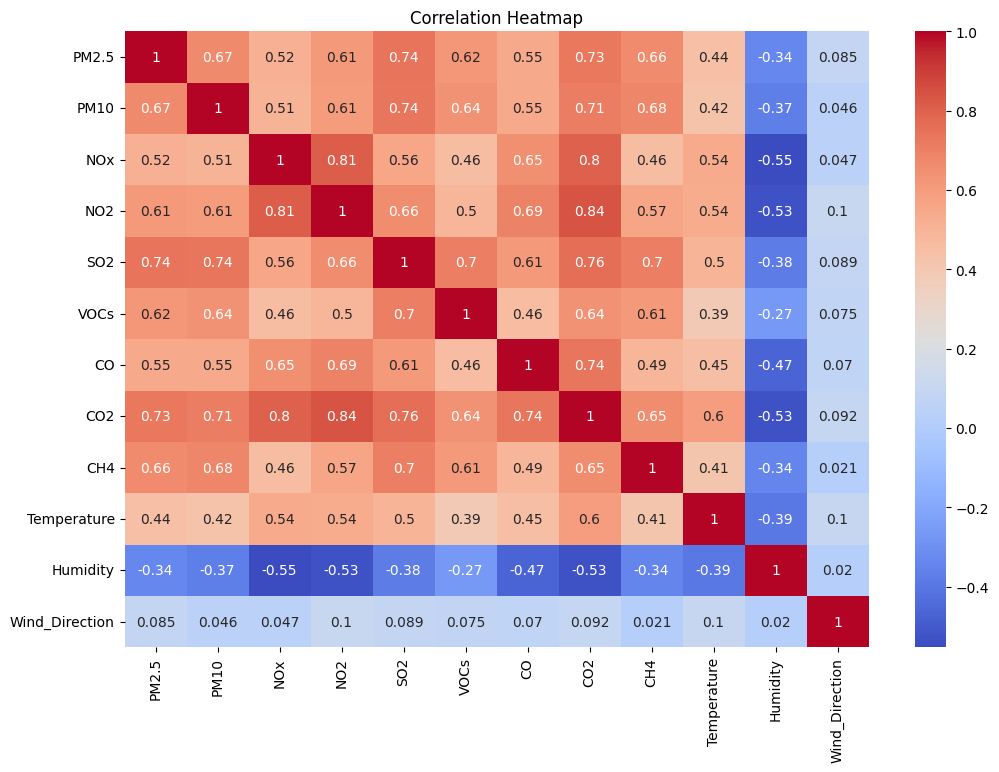

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Df_target

In [ ]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Time           1000 non-null   object 
 2   CO(GT)         1000 non-null   float64
 3   PT08.S1(CO)    1000 non-null   int64  
 4   NMHC(GT)       1000 non-null   int64  
 5   C6H6(GT)       1000 non-null   float64
 6   PT08.S2(NMHC)  1000 non-null   int64  
 7   NOx(GT)        1000 non-null   int64  
 8   PT08.S3(NOx)   1000 non-null   int64  
 9   NO2(GT)        1000 non-null   int64  
 10  PT08.S4(NO2)   1000 non-null   int64  
 11  PT08.S5(O3)    1000 non-null   int64  
 12  T              1000 non-null   float64
 13  RH             1000 non-null   float64
 14  AH             1000 non-null   float64
 15  Target         1000 non-null   object 
dtypes: float64(5), int64(8), object(3)
memory usage: 125.1+ KB


In [ ]:
df_target

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Target
0,01-03-2004,00:00:00,-200.0,1475,120,32.8,1065,-200,502,60,1339,1270,19.9,46.4,1.3970,High
1,01-03-2004,01:00:00,-200.0,968,-200,13.0,1194,100,635,60,1187,1442,17.6,18.3,1.4657,Moderate
2,01-03-2004,02:00:00,-200.0,1097,120,9.2,1159,100,809,-200,1334,1388,10.9,59.2,0.9877,Low
3,01-03-2004,03:00:00,0.5,1032,-200,18.4,978,150,948,60,1056,789,3.8,56.2,0.8256,Low
4,01-03-2004,04:00:00,0.5,1070,120,11.1,776,-200,731,60,1300,981,15.5,20.9,1.1638,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11-04-2004,11:00:00,0.5,1269,120,14.1,851,100,842,-200,1630,1305,5.9,19.2,0.3457,High
996,11-04-2004,12:00:00,-200.0,876,150,16.3,940,150,919,100,1275,1280,15.5,26.2,0.6954,High
997,11-04-2004,13:00:00,1.0,1320,120,6.3,652,150,983,100,1019,764,2.9,58.3,1.2069,Low
998,11-04-2004,14:00:00,1.0,823,150,17.0,729,100,687,60,875,892,9.0,70.5,0.7425,High


# pre processing the data with target

In [ ]:
df_target.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [ ]:
df_target.duplicated().sum()

np.int64(0)

In [ ]:
df_target.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),1000.0,-64.311000,93.985765,-200.0000,-200.000000,0.50000,1.00000,1.0000
PT08.S1(CO),1000.0,1214.560000,231.439315,800.0000,1020.000000,1221.00000,1422.00000,1599.0000
NMHC(GT),1000.0,26.800000,156.864165,-200.0000,-200.000000,120.00000,150.00000,150.0000
C6H6(GT),1000.0,18.433100,9.480823,2.0000,10.500000,18.35000,26.35000,35.0000
PT08.S2(NMHC),1000.0,903.885000,174.633704,601.0000,754.750000,906.00000,1060.25000,1198.0000
NOx(GT),1000.0,13.500000,156.003484,-200.0000,-200.000000,100.00000,150.00000,150.0000
PT08.S3(NOx),1000.0,703.150000,173.124792,400.0000,553.750000,703.00000,854.25000,999.0000
NO2(GT),1000.0,-12.300000,133.103067,-200.0000,-200.000000,60.00000,100.00000,100.0000
PT08.S4(NO2),1000.0,1157.624000,313.139517,600.0000,885.250000,1166.50000,1424.25000,1699.0000
PT08.S5(O3),1000.0,1208.054000,284.691476,700.0000,961.750000,1208.50000,1453.00000,1697.0000


# d-type change

In [ ]:
df_target['Date'] = pd.to_datetime(df_target['Date'],dayfirst = True)

In [ ]:
df_target['Time'] = pd.to_datetime(df_target['Time'])

In [ ]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Time           1000 non-null   datetime64[ns]
 2   CO(GT)         1000 non-null   float64       
 3   PT08.S1(CO)    1000 non-null   int64         
 4   NMHC(GT)       1000 non-null   int64         
 5   C6H6(GT)       1000 non-null   float64       
 6   PT08.S2(NMHC)  1000 non-null   int64         
 7   NOx(GT)        1000 non-null   int64         
 8   PT08.S3(NOx)   1000 non-null   int64         
 9   NO2(GT)        1000 non-null   int64         
 10  PT08.S4(NO2)   1000 non-null   int64         
 11  PT08.S5(O3)    1000 non-null   int64         
 12  T              1000 non-null   float64       
 13  RH             1000 non-null   float64       
 14  AH             1000 non-null   float64       
 15  Target         1000 no

# Featuure Extraction

In [ ]:
df_target['Year'] = df_target['Date'].dt.year
df_target['Month'] = df_target['Date'].dt.month
df_target['Day'] = df_target['Date'].dt.day
df_target['Weekday'] = df_target['Date'].dt.day_name()

In [ ]:
print(df_target['Date'].dtype)


datetime64[ns]


In [ ]:
df_target.drop(columns=['Date','Time'],inplace = True)

In [ ]:
df_target

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Target,Year,Month,Day,Weekday
0,-200.0,1475,120,32.8,1065,-200,502,60,1339,1270,19.9,46.4,1.3970,High,2004,3,1,Monday
1,-200.0,968,-200,13.0,1194,100,635,60,1187,1442,17.6,18.3,1.4657,Moderate,2004,3,1,Monday
2,-200.0,1097,120,9.2,1159,100,809,-200,1334,1388,10.9,59.2,0.9877,Low,2004,3,1,Monday
3,0.5,1032,-200,18.4,978,150,948,60,1056,789,3.8,56.2,0.8256,Low,2004,3,1,Monday
4,0.5,1070,120,11.1,776,-200,731,60,1300,981,15.5,20.9,1.1638,Low,2004,3,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.5,1269,120,14.1,851,100,842,-200,1630,1305,5.9,19.2,0.3457,High,2004,4,11,Sunday
996,-200.0,876,150,16.3,940,150,919,100,1275,1280,15.5,26.2,0.6954,High,2004,4,11,Sunday
997,1.0,1320,120,6.3,652,150,983,100,1019,764,2.9,58.3,1.2069,Low,2004,4,11,Sunday
998,1.0,823,150,17.0,729,100,687,60,875,892,9.0,70.5,0.7425,High,2004,4,11,Sunday


# Visualization target with data

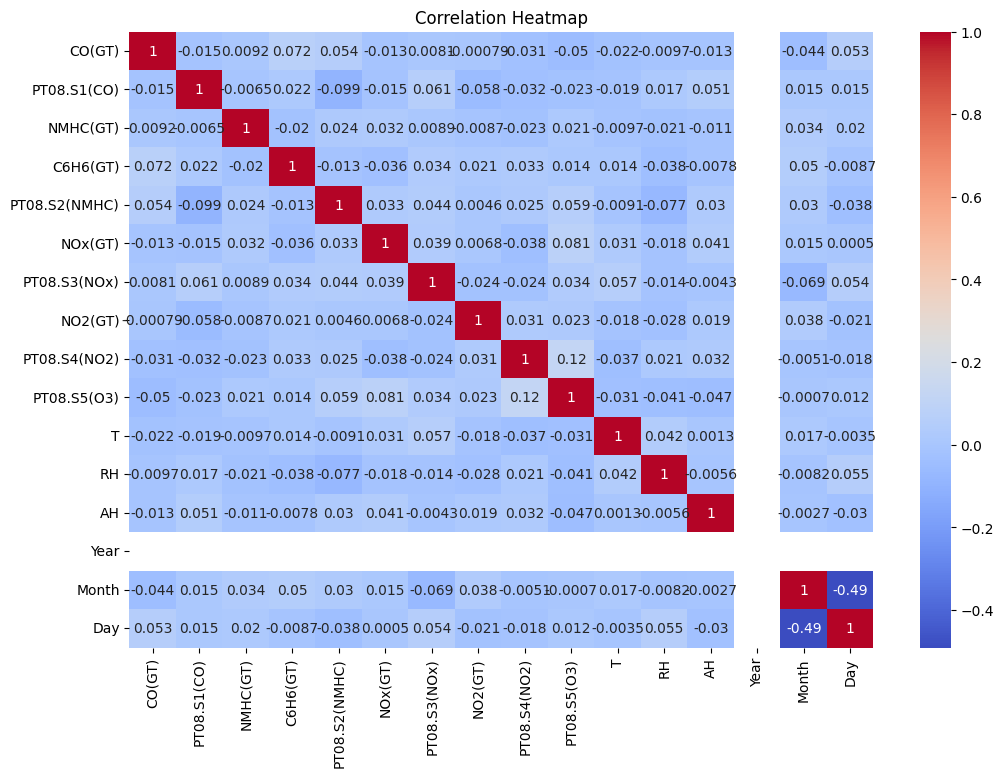

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_target.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


- Not corelated to the columns for reducing dimentionality removing colummns

In [ ]:
df_target.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'Target', 'Year', 'Month', 'Day', 'Weekday'],
      dtype='object')

In [ ]:
df_target.drop(columns = ['Year', 'Month', 'Day', 'Weekday'],inplace = True)

In [ ]:
df_target

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Target
0,-200.0,1475,120,32.8,1065,-200,502,60,1339,1270,19.9,46.4,1.3970,High
1,-200.0,968,-200,13.0,1194,100,635,60,1187,1442,17.6,18.3,1.4657,Moderate
2,-200.0,1097,120,9.2,1159,100,809,-200,1334,1388,10.9,59.2,0.9877,Low
3,0.5,1032,-200,18.4,978,150,948,60,1056,789,3.8,56.2,0.8256,Low
4,0.5,1070,120,11.1,776,-200,731,60,1300,981,15.5,20.9,1.1638,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.5,1269,120,14.1,851,100,842,-200,1630,1305,5.9,19.2,0.3457,High
996,-200.0,876,150,16.3,940,150,919,100,1275,1280,15.5,26.2,0.6954,High
997,1.0,1320,120,6.3,652,150,983,100,1019,764,2.9,58.3,1.2069,Low
998,1.0,823,150,17.0,729,100,687,60,875,892,9.0,70.5,0.7425,High


In [ ]:
df_target.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'Target'],
      dtype='object')

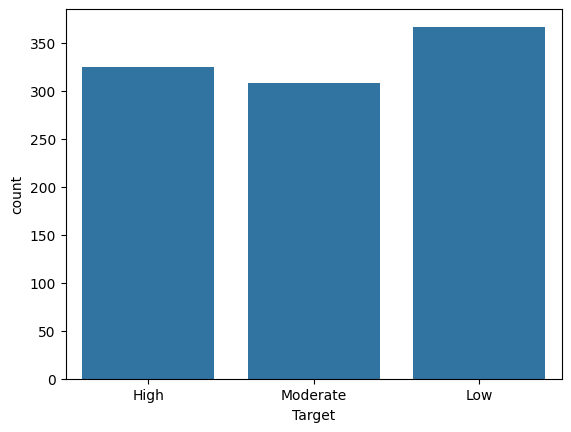

In [ ]:
sns.countplot(data=df_target, x='Target')
plt.show()

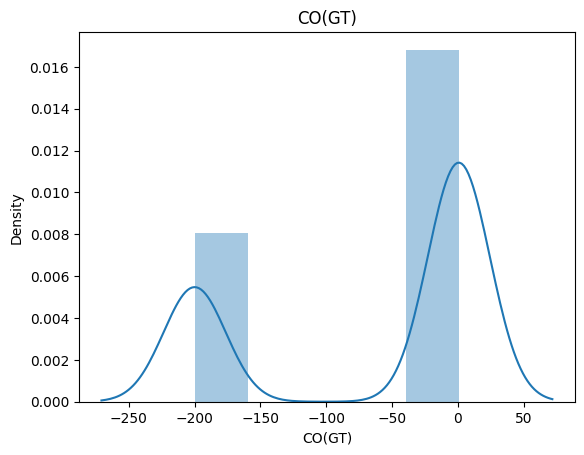

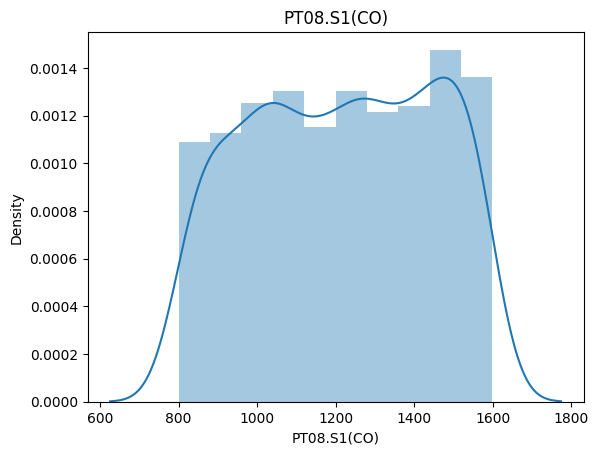

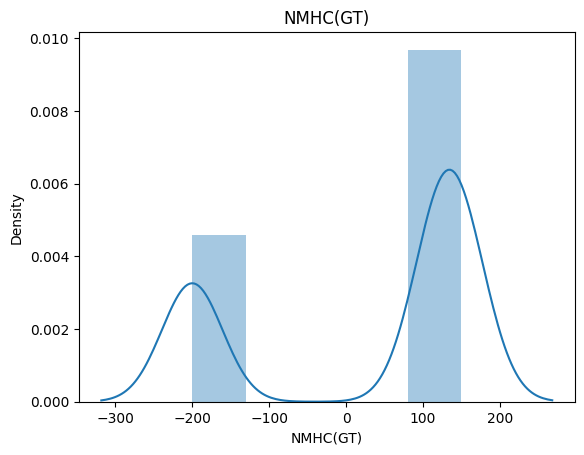

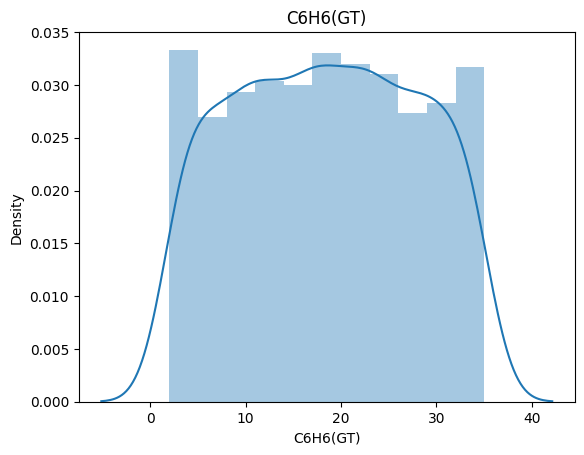

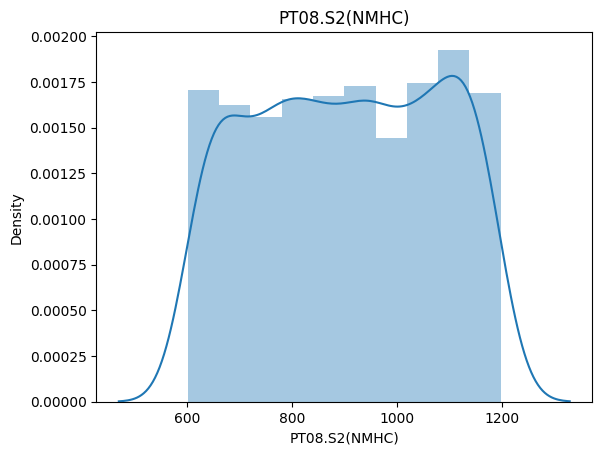

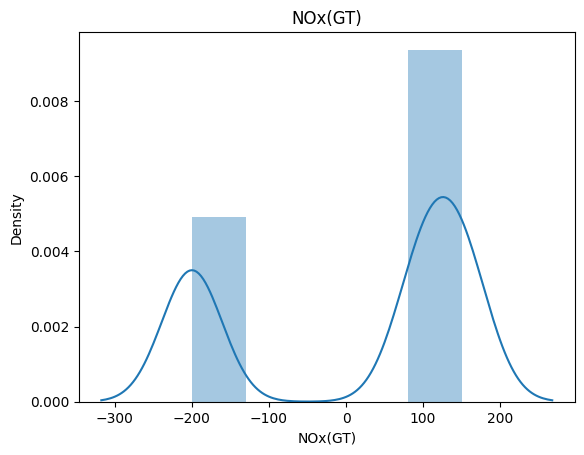

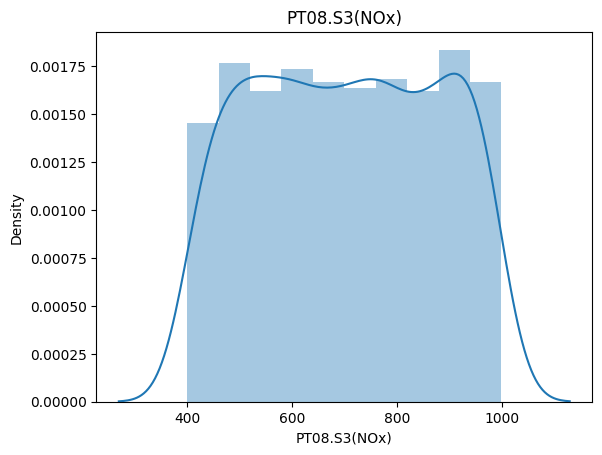

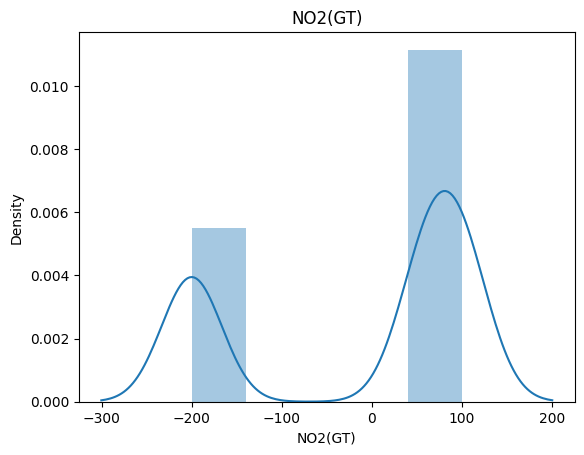

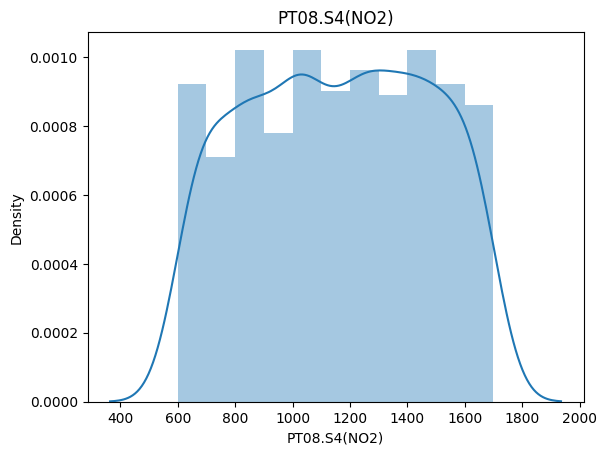

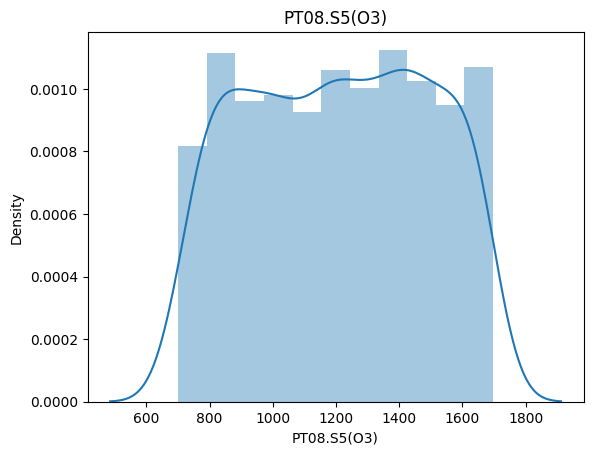

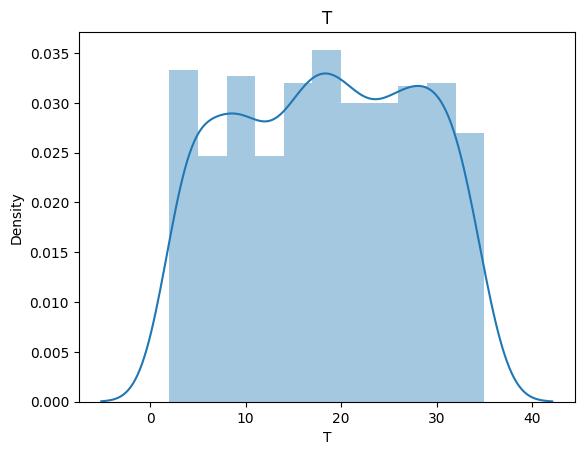

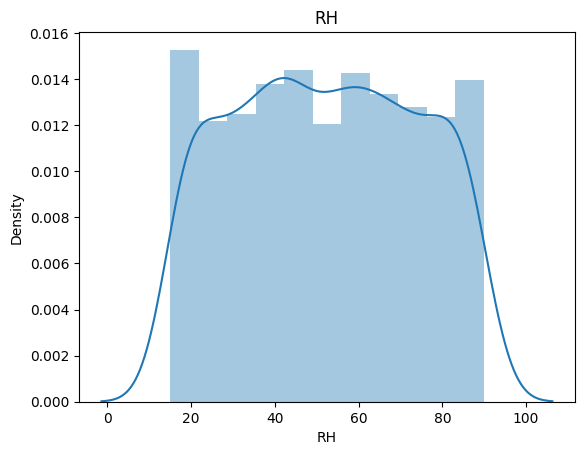

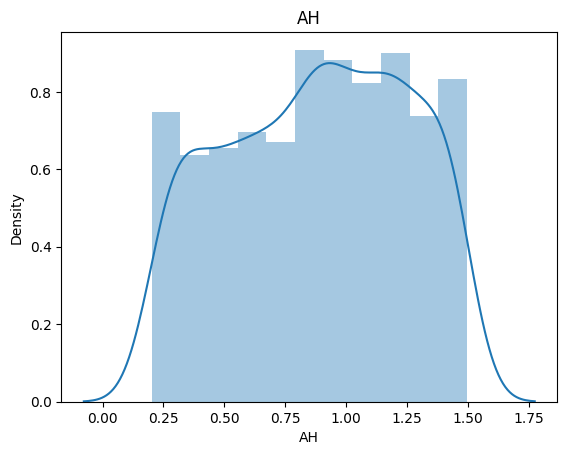

In [ ]:
for i in df_target.select_dtypes(['float64','int64']).columns:
    sns.distplot(df_target[i])
    plt.title(i)
    plt.show()

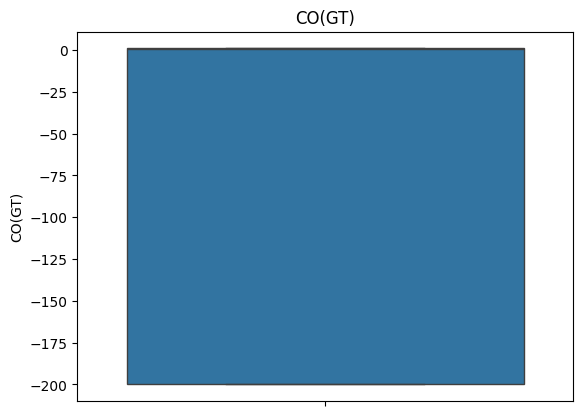

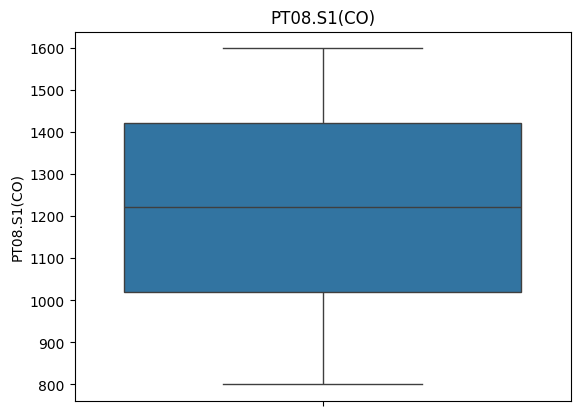

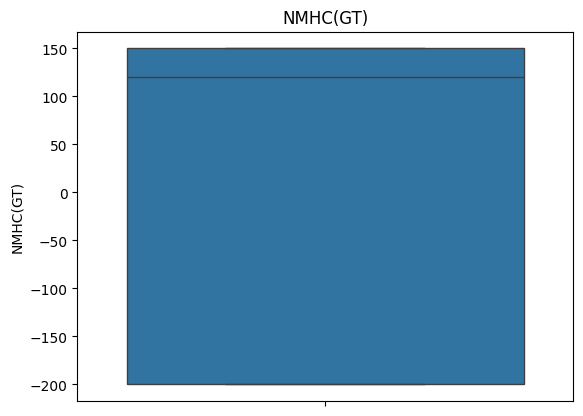

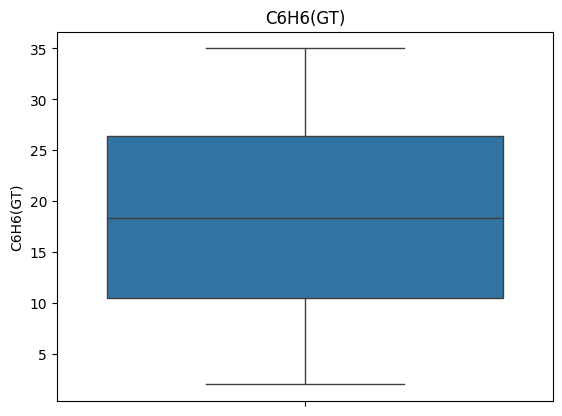

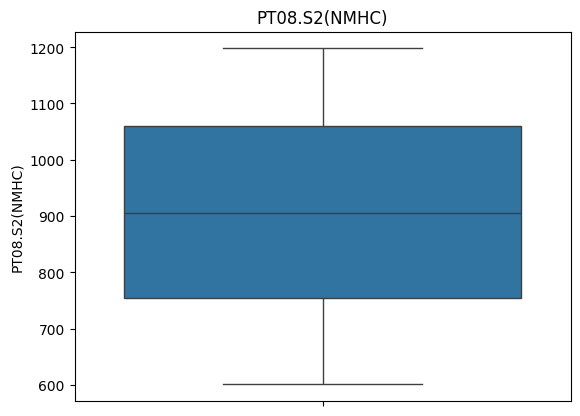

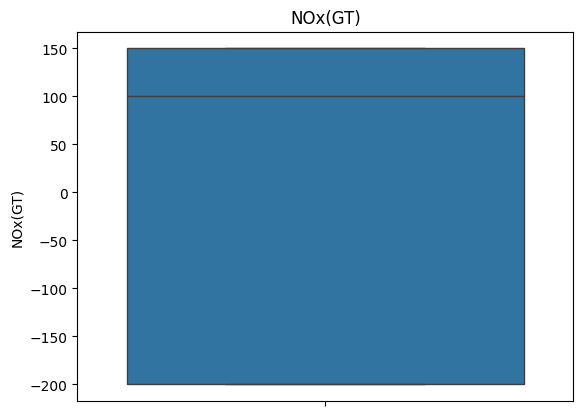

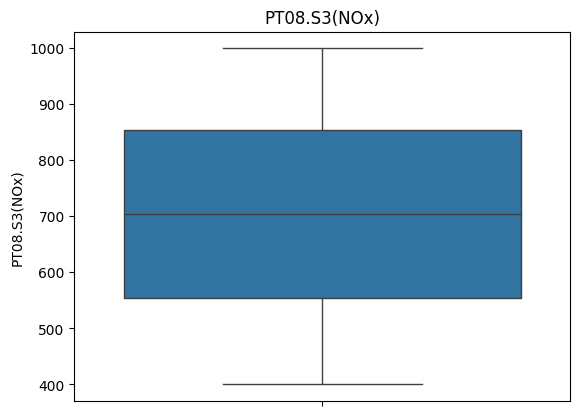

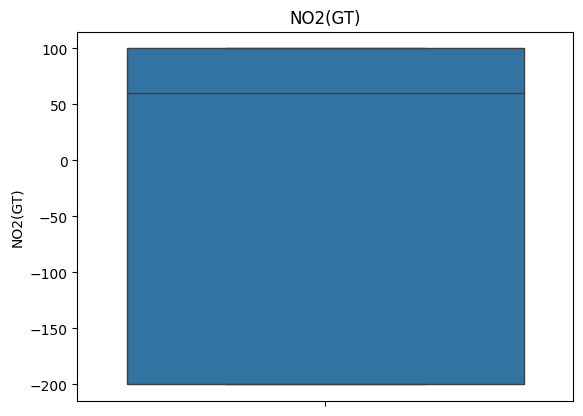

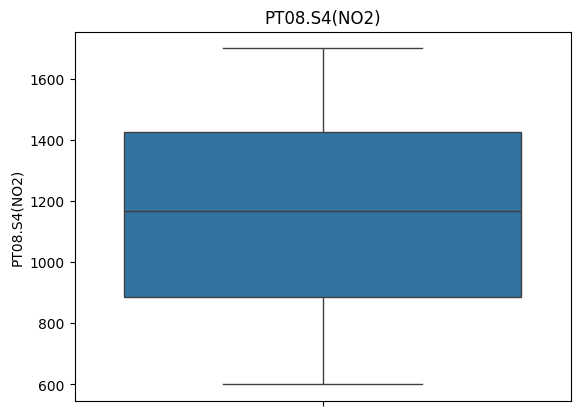

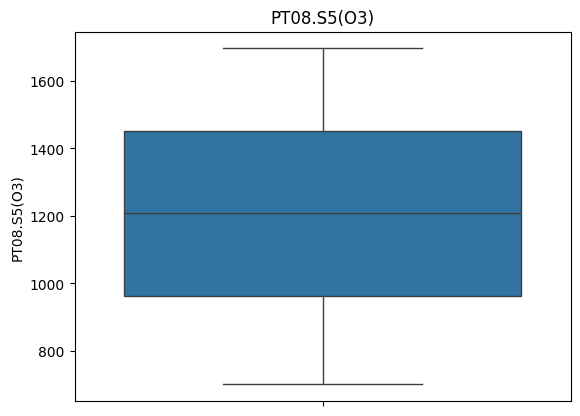

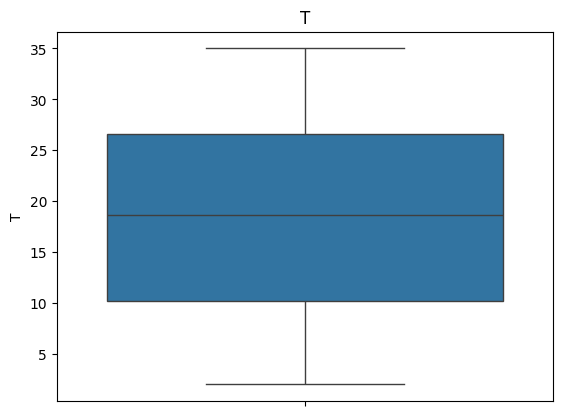

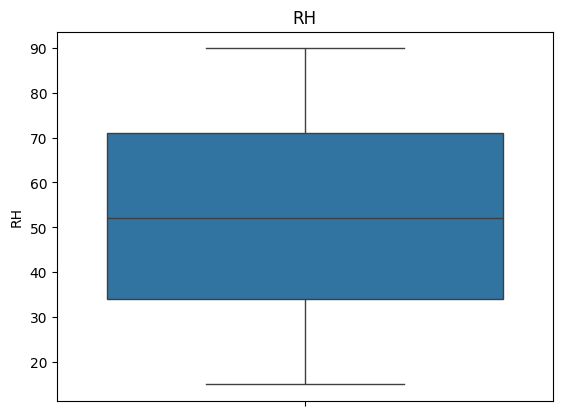

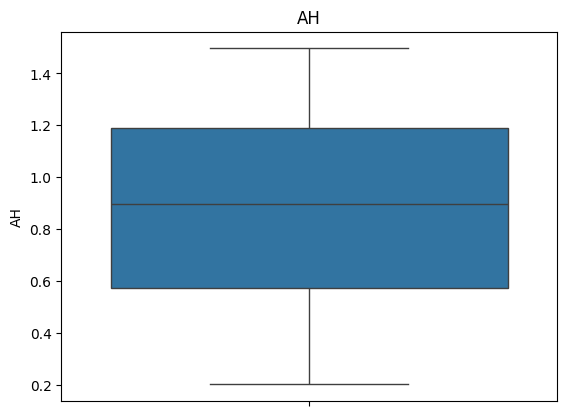

In [ ]:
for i in df_target.select_dtypes(['float64','int64']).columns:
    sns.boxplot(df_target[i])
    plt.title(i)
    plt.show()

# Machine Learing Approchs

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df_target.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'Target'],
      dtype='object')

In [ ]:
y = df_target['Target']
x = df_target.drop(columns = 'Target')

In [ ]:
sc = StandardScaler()

In [ ]:
x = sc.fit_transform(x)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

In [ ]:
y.unique()

array(['High', 'Moderate', 'Low'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
y = le.fit_transform(y)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.2,random_state= 20)

In [ ]:
xtrain.shape,len(xtest),ytrain.shape,len(ytest)

((800, 13), 200, (800,), 200)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix

In [ ]:
def evaluation_score(model):

    model.fit(xtrain,ytrain)

    ypred = model.predict(xtest)
    print(f"Model Name : {model.__class__.__name__}")
    print(f"Accuracy Score : {accuracy_score(ytest,ypred)}",end = "\n")
    print(f"Classification Report :")
    print(classification_report(ytest,ypred))

    conf_mat = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Model Name : DecisionTreeClassifier
Accuracy Score : 0.36
Classification Report :
              precision    recall  f1-score   support

           0       0.39      0.33      0.36        66
           1       0.39      0.39      0.39        75
           2       0.31      0.36      0.33        59

    accuracy                           0.36       200
   macro avg       0.36      0.36      0.36       200
weighted avg       0.36      0.36      0.36       200



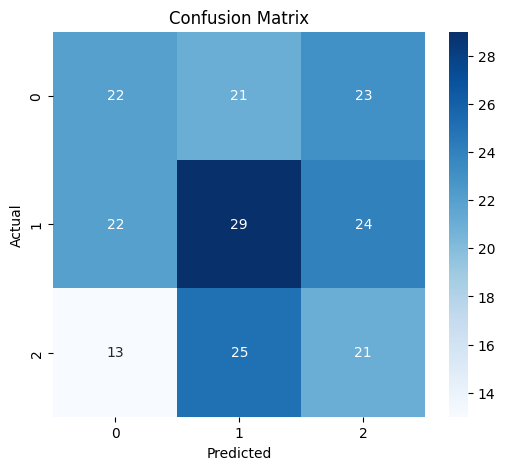

In [ ]:
evaluation_score(DecisionTreeClassifier())

Model Name : RandomForestClassifier
Accuracy Score : 0.345
Classification Report :
              precision    recall  f1-score   support

           0       0.35      0.29      0.32        66
           1       0.35      0.39      0.37        75
           2       0.33      0.36      0.34        59

    accuracy                           0.34       200
   macro avg       0.34      0.34      0.34       200
weighted avg       0.35      0.34      0.34       200



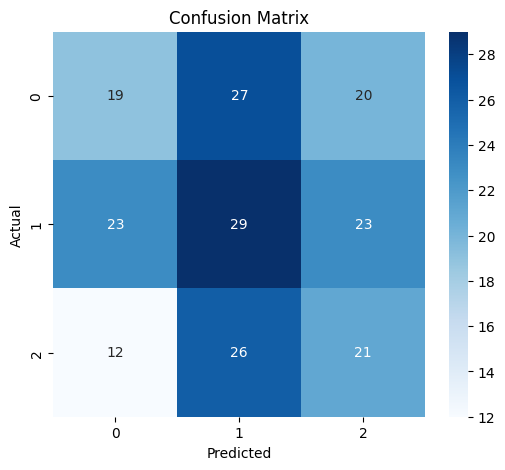

In [ ]:
evaluation_score(RandomForestClassifier())

Model Name : SVC
Accuracy Score : 0.315
Classification Report :
              precision    recall  f1-score   support

           0       0.30      0.27      0.28        66
           1       0.33      0.41      0.37        75
           2       0.30      0.24      0.27        59

    accuracy                           0.32       200
   macro avg       0.31      0.31      0.31       200
weighted avg       0.31      0.32      0.31       200



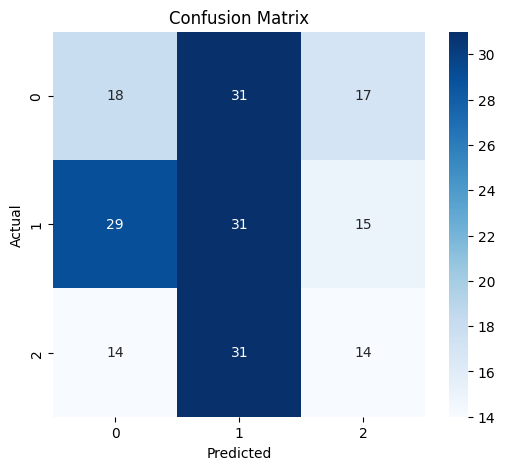

In [ ]:
evaluation_score(SVC())

In [ ]:
from sklearn.linear_model import LogisticRegression

Model Name : LogisticRegression
Accuracy Score : 0.32
Classification Report :
              precision    recall  f1-score   support

           0       0.28      0.33      0.30        66
           1       0.34      0.43      0.38        75
           2       0.37      0.17      0.23        59

    accuracy                           0.32       200
   macro avg       0.33      0.31      0.30       200
weighted avg       0.33      0.32      0.31       200



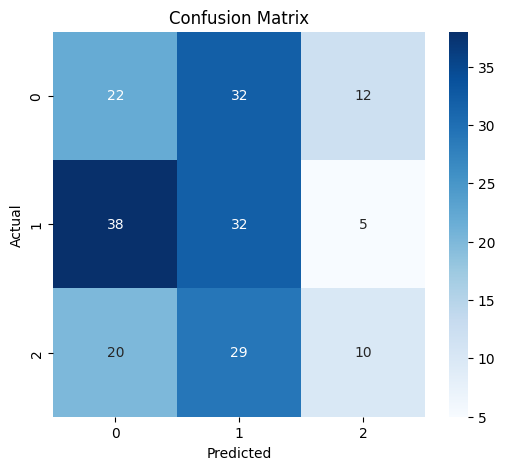

In [ ]:
evaluation_score(LogisticRegression())

In [ ]:
from xgboost import XGBClassifier

Model Name : XGBClassifier
Accuracy Score : 0.31
Classification Report :
              precision    recall  f1-score   support

           0       0.34      0.29      0.31        66
           1       0.33      0.31      0.32        75
           2       0.27      0.34      0.30        59

    accuracy                           0.31       200
   macro avg       0.31      0.31      0.31       200
weighted avg       0.31      0.31      0.31       200



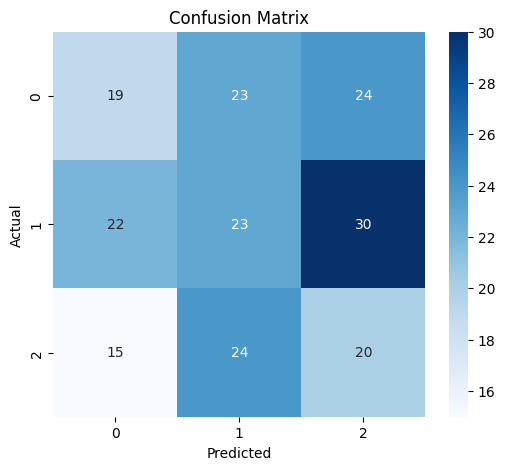

In [ ]:
evaluation_score(XGBClassifier())

In [ ]:
import lightgbm as lgb

In [ ]:
model = lgb.LGBMClassifier()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2251
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 13
[LightGBM] [Info] Start training from score -1.127784
[LightGBM] [Info] Start training from score -1.007858
[LightGBM] [Info] Start training from score -1.167159
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

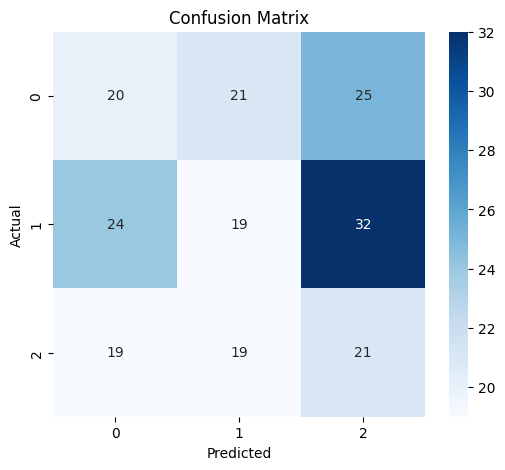

In [ ]:
evaluation_score(model)